In [1]:
#INF2178 Assignment1
#Jinhang Luo 1005124777

# loading packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# loading and read the dataset
data = pd.read_excel('INF2178_A1_data.xlsx')
# check the data
data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'INF2178_A1_data.xlsx'

In [2]:
# cleanning process
# dropping columns 
columns_to_drop = ['PROGRAM_ID','PROGRAM_AREA','PROGRAM_NAME', 'ORGANIZATION_NAME', 'OVERNIGHT_SERVICE_TYPE']
data_new = data.drop(columns=columns_to_drop)

# fill missing values with 0 
data_new['CAPACITY_ACTUAL_BED'].fillna(0, inplace=True)
data_new['CAPACITY_ACTUAL_ROOM'].fillna(0, inplace=True)
data_new['OCCUPIED_ROOMS'].fillna(0, inplace=True)
data_new['OCCUPIED_BEDS'].fillna(0, inplace=True)

# calculate occupancy rates
data_new['OCCUPANCY_RATE_BED'] = data_new['OCCUPIED_BEDS'] / data_new['CAPACITY_ACTUAL_BED']
data_new['OCCUPANCY_RATE_ROOM'] = data_new['OCCUPIED_ROOMS'] / data_new['CAPACITY_ACTUAL_ROOM']

# check the cleaned new data
data_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OCCUPANCY_DATE        50944 non-null  datetime64[ns]
 1   SECTOR                50944 non-null  object        
 2   PROGRAM_MODEL         50942 non-null  object        
 3   SERVICE_USER_COUNT    50944 non-null  int64         
 4   CAPACITY_TYPE         50944 non-null  object        
 5   CAPACITY_ACTUAL_BED   50944 non-null  float64       
 6   OCCUPIED_BEDS         50944 non-null  float64       
 7   CAPACITY_ACTUAL_ROOM  50944 non-null  float64       
 8   OCCUPIED_ROOMS        50944 non-null  float64       
 9   OCCUPANCY_RATE_BED    32399 non-null  float64       
 10  OCCUPANCY_RATE_ROOM   18545 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 4.3+ MB


In [3]:
# show first 10 rows
data_new.head(10)

,OCCUPANCY_DATE,SECTOR,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE_BED,OCCUPANCY_RATE_ROOM
0,2021-01-01,Families,Emergency,74,Room Based Capacity,0.0,0.0,29.0,26.0,NaN,0.896552
1,2021-01-01,Mixed Adult,Emergency,3,Room Based Capacity,0.0,0.0,3.0,3.0,NaN,1.000000
2,2021-01-01,Men,Emergency,24,Room Based Capacity,0.0,0.0,28.0,23.0,NaN,0.821429
3,2021-01-01,Mixed Adult,Emergency,25,Room Based Capacity,0.0,0.0,17.0,17.0,NaN,1.000000
4,2021-01-01,Women,Emergency,13,Room Based Capacity,0.0,0.0,14.0,13.0,NaN,0.928571
5,2021-01-01,Mixed Adult,Emergency,6,Bed Based Capacity,8.0,6.0,0.0,0.0,0.75,NaN
6,2021-01-01,Families,Emergency,120,Room Based Capacity,0.0,0.0,46.0,44.0,NaN,0.956522
7,2021-01-01,Families,Emergency,130,Room Based Capacity,0.0,0.0,46.0,44.0,NaN,0.956522
8,2021-01-01,Mixed Adult,Emergency,153,Room Based Capacity,0.0,0.0,145.0,145.0,NaN,1.000000
9,2021-01-01,Men,Emergency,40,Room Based Capacity,0.0,0.0,41.0,40.0,NaN,0.975610


In [4]:
# descriptive statistics
# print description of the data
data_new.describe()

,OCCUPANCY_DATE,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE_BED,OCCUPANCY_RATE_ROOM
count,50944,50944.000000,50944.000000,50944.000000,50944.000000,50944.000000,32399.000000,18545.000000
mean,2021-06-29 13:31:57.022612992,45.727171,20.114008,18.939443,20.221439,19.220124,0.927885,0.934087
min,2021-01-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.012048
25%,2021-03-30 00:00:00,15.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.958333
50%,2021-06-28 00:00:00,28.000000,14.000000,12.000000,0.000000,0.000000,1.000000,1.000000
75%,2021-09-29 00:00:00,51.000000,29.000000,28.000000,22.000000,20.000000,1.000000,1.000000
max,2021-12-31 00:00:00,339.000000,234.000000,234.000000,268.000000,268.000000,1.000000,1.014085
std,NaN,53.326049,26.449843,25.453389,44.731193,43.630866,0.122562,0.163241


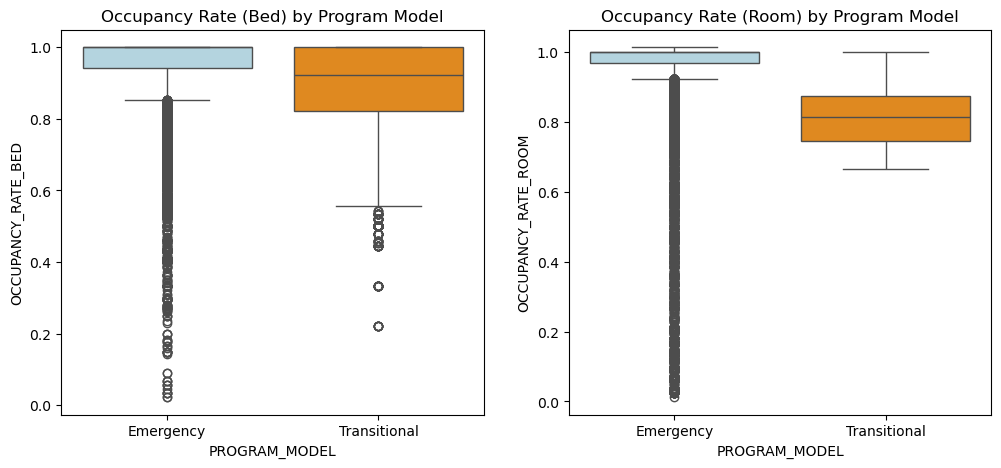

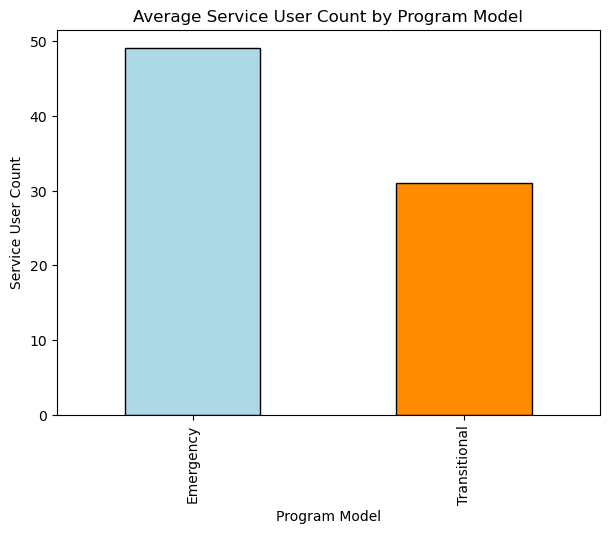

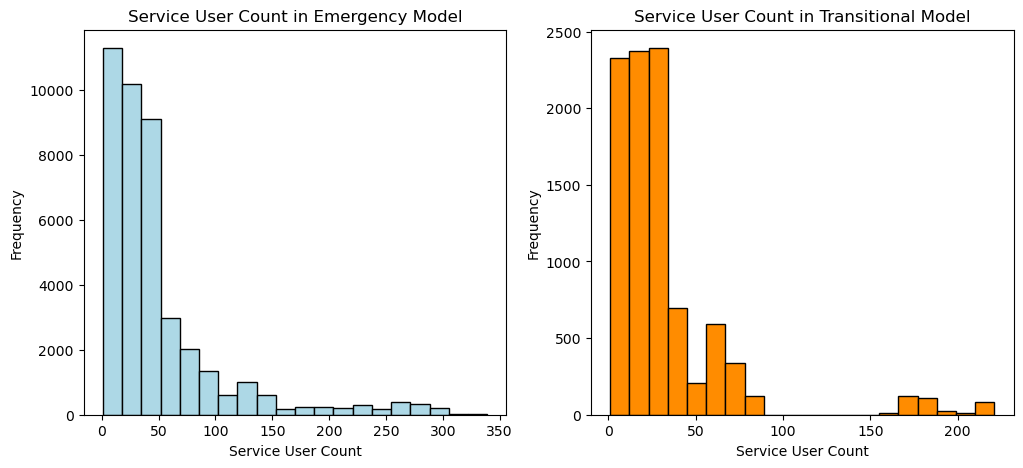

In [5]:
# boxplots for occupancy rates(bed & room)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPANCY_RATE_BED', hue='PROGRAM_MODEL', data=data_new, palette=['#ADD8E6', '#FF8C00'],legend=False)
plt.title('Occupancy Rate (Bed) by Program Model')

plt.subplot(1, 2, 2)
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPANCY_RATE_ROOM', hue='PROGRAM_MODEL',data=data_new,palette=['#ADD8E6', '#FF8C00'],legend=False)
plt.title('Occupancy Rate (Room) by Program Model')
plt.show()

# bar chart for service user count in  average 
plt.figure(figsize=(7, 5))
data_new.groupby('PROGRAM_MODEL')['SERVICE_USER_COUNT'].mean().plot(kind='bar',color=['#ADD8E6', '#FF8C00'],edgecolor='black')
plt.title('Average Service User Count by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Service User Count')
plt.show()

# histograms for service user count
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
data_new[data_new['PROGRAM_MODEL'] == 'Emergency']['SERVICE_USER_COUNT'].hist(bins=20,color='#ADD8E6',edgecolor='black')
plt.title('Service User Count in Emergency Model')
plt.xlabel('Service User Count')
plt.ylabel('Frequency')
plt.grid(False) 

plt.subplot(1, 2, 2)
data_new[data_new['PROGRAM_MODEL'] == 'Transitional']['SERVICE_USER_COUNT'].hist(bins=20,color='#FF8C00',edgecolor='black')
plt.title('Service User Count in Transitional Model')
plt.xlabel('Service User Count')
plt.ylabel('Frequency')
plt.grid(False) 
plt.show()




In [7]:
# t-test for program model and occupancy rate (bed)

emer_data = data_new[data_new['PROGRAM_MODEL'] =='Emergency']['OCCUPANCY_RATE_BED'].dropna()
tra_data = data_new[data_new['PROGRAM_MODEL'] =='Transitional']['OCCUPANCY_RATE_BED'].dropna()
t_statistic, p_value = ttest_ind(emer_data, tra_data)

# print the results
print("T-test for program model and occupancy rate (bed) :")
print(t_statistic)
print(p_value)

# t-test for program model and occupancy rate (room)
emer_data = data_new[data_new['PROGRAM_MODEL'] =='Emergency']['OCCUPANCY_RATE_ROOM'].dropna()
tra_data = data_new[data_new['PROGRAM_MODEL'] =='Transitional']['OCCUPANCY_RATE_ROOM'].dropna()
t_statistic, p_value = ttest_ind(emer_data, tra_data)

# print the results
print("T-test for program model and occupancy rate (room) :")
print(t_statistic)
print(p_value)

# t-test for program model and service user count
emer_data = data_new[data_new['PROGRAM_MODEL'] =='Emergency']['SERVICE_USER_COUNT'].dropna()
tra_data = data_new[data_new['PROGRAM_MODEL'] =='Transitional']['SERVICE_USER_COUNT'].dropna()
t_statistic, p_value = ttest_ind(emer_data, tra_data)

# print the results
print("T-test for program model and service user count :")
print(t_statistic)
print(p_value)

T-test for program model and occupancy rate (bed) :
38.780694714817365
0.0
T-test for program model and occupancy rate (room) :
18.903262158430557
5.923255977527666e-79
T-test for program model and service user count :
29.937570467283667
3.1720139638162956e-195
